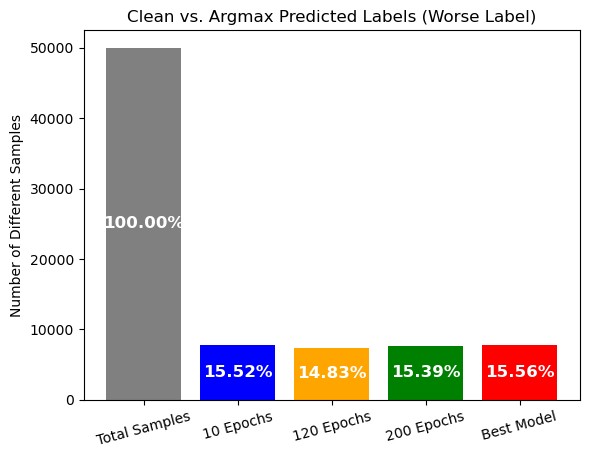

Total samples: 50000
Total Samples: 50000 different labels (100.00%)
10 Epochs: 7758 different labels (15.52%)
120 Epochs: 7414 different labels (14.83%)
200 Epochs: 7696 different labels (15.39%)
Best Model: 7780 different labels (15.56%)


In [8]:
import numpy as np
import matplotlib.pyplot as plt

# 加载 ground truth 标签和多个预测标签文件
gt_labels_path = "original_labels/cifar10_train_clean_labels.npy"
pred_labels_paths = {
    "10 Epochs": "cross_validated_predicted_labels/cifar10_trainset_pyx_argmax_predicted_labels_random_label1_5fold_10epoch.npy",
    "120 Epochs": "cross_validated_predicted_labels/cifar10_trainset_pyx_argmax_predicted_labels_random_label1_5fold_120epoch.npy",
    "200 Epochs": "cross_validated_predicted_labels/cifar10_trainset_pyx_argmax_predicted_labels_random_label1_5fold_200epoch.npy",
    "Best Model": "cross_validated_predicted_labels/Best_model_cifar10_trainset_pyx_argmax_predicted_labels_random_label1_5fold.npy"
}

gt_labels = np.load(gt_labels_path)
total_samples = len(gt_labels)

# 存储不同的数量和占比
differences = {"Total Samples": (total_samples, 100.0)}
for label, path in pred_labels_paths.items():
    pred_labels = np.load(path)
    num_differences = np.sum(gt_labels != pred_labels)
    difference_ratio = num_differences / total_samples * 100
    differences[label] = (num_differences, difference_ratio)

# 可视化对比
fig, ax = plt.subplots()
labels = list(differences.keys())
numbers = [differences[label][0] for label in labels]
percentages = [differences[label][1] for label in labels]

ax.bar(labels, numbers, color=["gray", "blue", "orange", "green", "red"])
ax.set_ylabel("Number of Different Samples")
ax.set_title("Clean vs. Argmax Predicted Labels (Worse Label)")

# 在柱子上标记百分比
for i, v in enumerate(numbers):
    ax.text(i, v / 2, f"{percentages[i]:.2f}%", ha='center', va='center', fontsize=12, color='white', weight='bold')

plt.xticks(rotation=15)
plt.show()

# 打印统计结果
print(f"Total samples: {total_samples}")
for label, (num_diff, diff_ratio) in differences.items():
    print(f"{label}: {num_diff} different labels ({diff_ratio:.2f}%)")


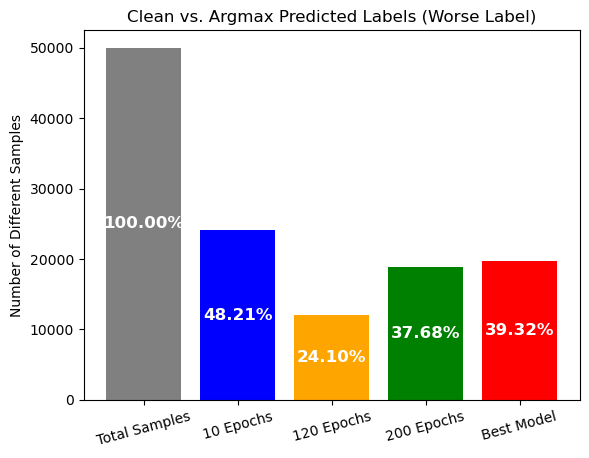

Total samples: 50000
Total Samples: 50000 different labels (100.00%)
10 Epochs: 24103 different labels (48.21%)
120 Epochs: 12052 different labels (24.10%)
200 Epochs: 18841 different labels (37.68%)
Best Model: 19660 different labels (39.32%)


In [6]:
import numpy as np
import matplotlib.pyplot as plt

# 加载 ground truth 标签和多个预测标签文件
gt_labels_path = "original_labels/cifar10_train_clean_labels.npy"
pred_labels_paths = {
    "10 Epochs": "cross_validated_predicted_labels/cifar10_trainset_pyx_argmax_predicted_labels_worse_label_5fold_10epoch.npy",
    "120 Epochs": "cross_validated_predicted_labels/cifar10_trainset_pyx_argmax_predicted_labels_worse_label_5fold_120epoch.npy",
    "200 Epochs": "cross_validated_predicted_labels/cifar10_trainset_pyx_argmax_predicted_labels_worse_label_5fold_200epoch.npy",
    "Best Model": "cross_validated_predicted_labels/Best_model_cifar10_trainset_pyx_argmax_predicted_labels_worse_label_5fold.npy"
}

gt_labels = np.load(gt_labels_path)
total_samples = len(gt_labels)

# 存储不同的数量和占比
differences = {"Total Samples": (total_samples, 100.0)}
for label, path in pred_labels_paths.items():
    pred_labels = np.load(path)
    num_differences = np.sum(gt_labels != pred_labels)
    difference_ratio = num_differences / total_samples * 100
    differences[label] = (num_differences, difference_ratio)

# 可视化对比
fig, ax = plt.subplots()
labels = list(differences.keys())
numbers = [differences[label][0] for label in labels]
percentages = [differences[label][1] for label in labels]

ax.bar(labels, numbers, color=["gray", "blue", "orange", "green", "red"])
ax.set_ylabel("Number of Different Samples")
ax.set_title("Clean vs. Argmax Predicted Labels (Worse Label)")

# 在柱子上标记百分比
for i, v in enumerate(numbers):
    ax.text(i, v / 2, f"{percentages[i]:.2f}%", ha='center', va='center', fontsize=12, color='white', weight='bold')

plt.xticks(rotation=15)
plt.show()

# 打印统计结果
print(f"Total samples: {total_samples}")
for label, (num_diff, diff_ratio) in differences.items():
    print(f"{label}: {num_diff} different labels ({diff_ratio:.2f}%)")


============= CIFAR-10 预测错误分析 =============
总 样 本 数  ：50000
错误预测样本数 ：4945
各类别在错误样本中的出现次数 (转为 (10, 1) 形状后)：
[[421]
 [317]
 [733]
 [830]
 [511]
 [873]
 [311]
 [396]
 [319]
 [234]]


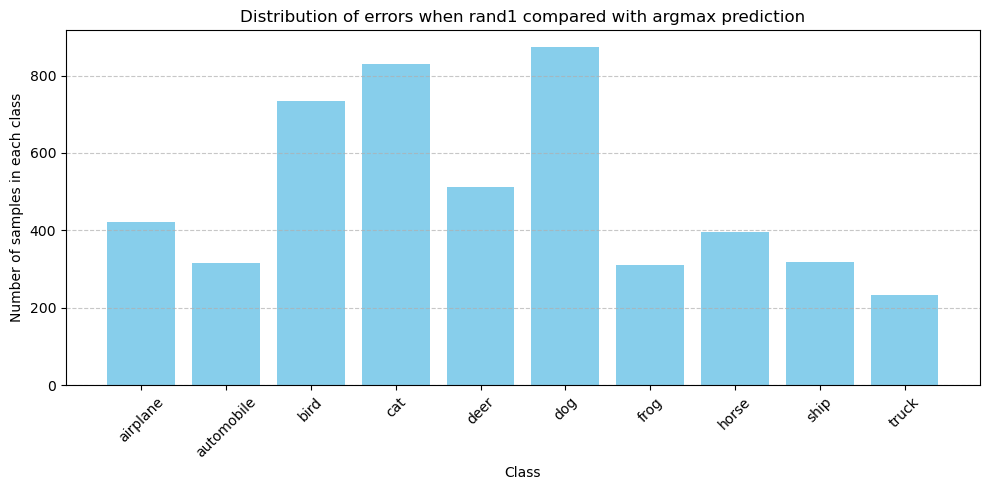

In [14]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-

"""
统计CIFAR-10预测结果出错的标签主要集中在哪些类，并生成柱状图。
x轴使用CIFAR-10官方类别名称。
"""

import numpy as np
import matplotlib.pyplot as plt

def main():
    # CIFAR-10 类别名称列表 (官方顺序)
    class_names = [
        "airplane",   # 0
        "automobile", # 1
        "bird",       # 2
        "cat",        # 3
        "deer",       # 4
        "dog",        # 5
        "frog",       # 6
        "horse",      # 7
        "ship",       # 8
        "truck"       # 9
    ]
    

    gt_labels_path = "original_labels/cifar10_train_clean_labels.npy"   # ground true label a.k.a. clean label
    pred_labels_path = "cross_validated_predicted_labels/Best_model_GPT_cifar10_trainset_pyx_argmax_predicted_labels_random_label1_5fold_200epoch.npy" # 通过5折交叉验证获取的预测标签
    rand1_labels_path = "original_labels/cifar10_rand1_labels.npy" # rand1 label: 人工标注的版本
    # 1. 加载ground truth标签和预测标签
    gt_labels = np.load(gt_labels_path)
    pred_labels = np.load(pred_labels_path)
    rand1_labels = np.load(rand1_labels_path)

    # 2. 检查标签数量是否一致
    if gt_labels.shape != pred_labels.shape:
        raise ValueError(f"Ground truth标签和预测标签形状不一致: "
                         f"{gt_labels.shape} vs {pred_labels.shape}")

    # 3. 找出预测错误的索引，并统计错误所在真实标签分布
    error_indices = np.where(gt_labels != pred_labels)[0]
    error_gt_labels = pred_labels[error_indices]  # 这些样本的argmax predict label
    error_counts = np.bincount(error_gt_labels, minlength=10)  # CIFAR-10 有10类
    rand1_class_counts = np.bincount(rand1_labels, minlength=10) # 通过bincount统计每个类别出现的次数，设置索引值为0->9
    gt_classes_counts = np.bincount(gt_labels, minlength=10)
    pred_labels_counts = np.bincount(pred_labels,minlength=10)

    # 把rand1与pred作比较，如果rand1与pred不一致，那么把pred所对应的Class+1，反之则不做任何变化
    for i in range(len(rand1_labels)):
        if i in error_indices:
            rand1_class_counts[pred_labels[i]]+=1
        

    # 4. 转换为 (10, 1) 的数组
    error_tensor = error_counts.reshape(10, 1)

    print("============= CIFAR-10 预测错误分析 =============")
    print(f"总 样 本 数  ：{len(gt_labels)}")
    print(f"错误预测样本数 ：{len(error_indices)}")
    print("各类别在错误样本中的出现次数 (转为 (10, 1) 形状后)：")
    print(error_tensor)

    # 5. 绘制柱状图
    plt.figure(figsize=(10, 5))
    plt.bar(range(10), error_counts, color="skyblue")
    plt.xlabel("Class")
    plt.ylabel("Number of samples in each class")
    plt.title("Distribution of errors when rand1 compared with argmax prediction")

    # 将 x 轴替换为 CIFAR-10 类别名称
    plt.xticks(range(10), class_names, rotation=45)  # 可根据需要设置旋转角度
    
    # 添加网格线
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    main()


============= CIFAR-100 预测结果各类别样本数量 =============
Class 0: 584 samples
Class 1: 774 samples
Class 2: 468 samples
Class 3: 1066 samples
Class 4: 0 samples
Class 5: 559 samples
Class 6: 455 samples
Class 7: 655 samples
Class 8: 454 samples
Class 9: 501 samples
Class 10: 304 samples
Class 11: 559 samples
Class 12: 367 samples
Class 13: 719 samples
Class 14: 639 samples
Class 15: 522 samples
Class 16: 488 samples
Class 17: 543 samples
Class 18: 526 samples
Class 19: 686 samples
Class 20: 641 samples
Class 21: 594 samples
Class 22: 510 samples
Class 23: 634 samples
Class 24: 558 samples
Class 25: 338 samples
Class 26: 473 samples
Class 27: 328 samples
Class 28: 500 samples
Class 29: 464 samples
Class 30: 762 samples
Class 31: 544 samples
Class 32: 164 samples
Class 33: 598 samples
Class 34: 595 samples
Class 35: 377 samples
Class 36: 906 samples
Class 37: 511 samples
Class 38: 361 samples
Class 39: 664 samples
Class 40: 564 samples
Class 41: 523 samples
Class 42: 465 samples
Class 43: 665 s

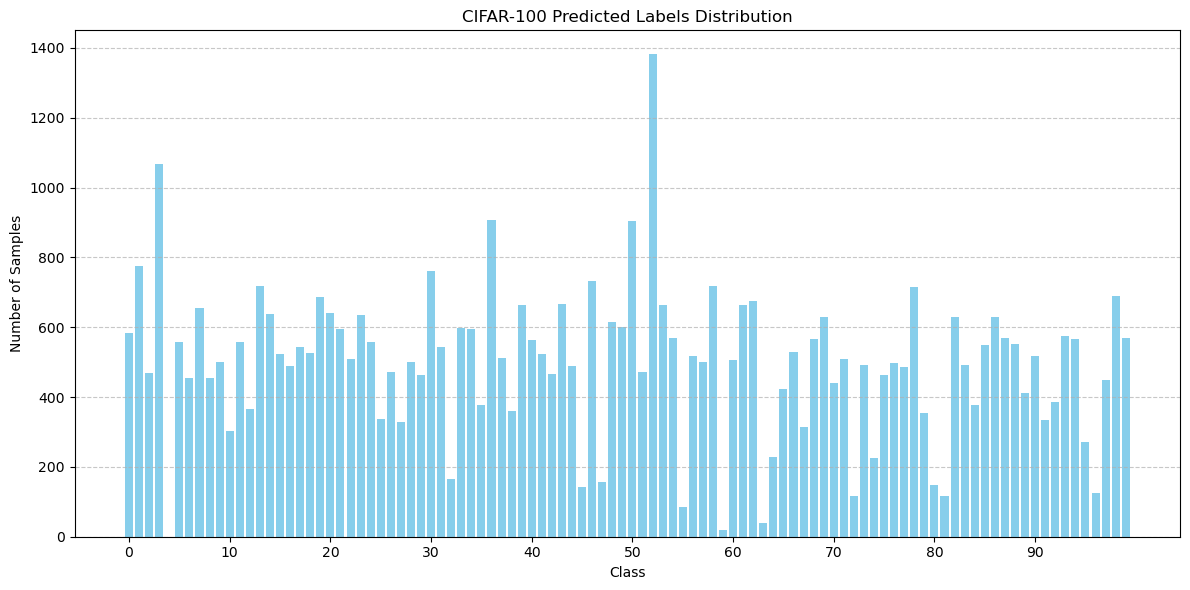

In [1]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-

"""
统计CIFAR-100 预测结果各类别的样本数量，并生成柱状图。
"""

import numpy as np
import matplotlib.pyplot as plt

def main():
    # 设置文件路径
    pred_labels_path = "cross_validated_predicted_labels/Best_model_Mixup_cifar100_trainset_pyx_argmax_predicted_labels_noisy_label_5fold_200epoch.npy"

    # 1. 加载预测标签
    pred_labels = np.load(pred_labels_path)

    # 检查数据范围是否符合 CIFAR-100 的类别范围
    if np.any(pred_labels < 0) or np.any(pred_labels >= 100):
        raise ValueError("预测标签中存在不在 [0, 99] 范围内的值，请检查数据。")

    # 2. 统计每个类别的样本数量
    class_counts = np.bincount(pred_labels, minlength=100)  # CIFAR-100 有 100 个类别

    # 3. 打印统计结果
    print("============= CIFAR-100 预测结果各类别样本数量 =============")
    for i, count in enumerate(class_counts):
        print(f"Class {i}: {count} samples")

    # 4. 绘制柱状图
    plt.figure(figsize=(12, 6))
    plt.bar(range(100), class_counts, color="skyblue")
    plt.xlabel("Class")
    plt.ylabel("Number of Samples")
    plt.title("CIFAR-100 Predicted Labels Distribution")

    # 设置 x 轴刻度为 0 到 99
    plt.xticks(range(0, 100, 10))  # 每隔 10 个类别显示一次刻度
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    main()
